In [5]:
# Load the COCO Annotations file for the training dataset
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2

# Path to the COCO annotation file
annotation_file = "C:/Users/sirajje/Desktop/new egg dataset/train/_annotations.coco.json"

# Initialize COCO API
coco = COCO(annotation_file)

# Get image and annotation IDs
image_ids = coco.getImgIds()
annotation_ids = coco.getAnnIds()

# Print basic info
print(f"Total Images: {len(image_ids)}")
print(f"Total Annotations: {len(annotation_ids)}")

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Total Images: 1867
Total Annotations: 3424


Class Distribution: {'fertile-infertile': 0, 'fertile': 1975, 'infertile': 1449}


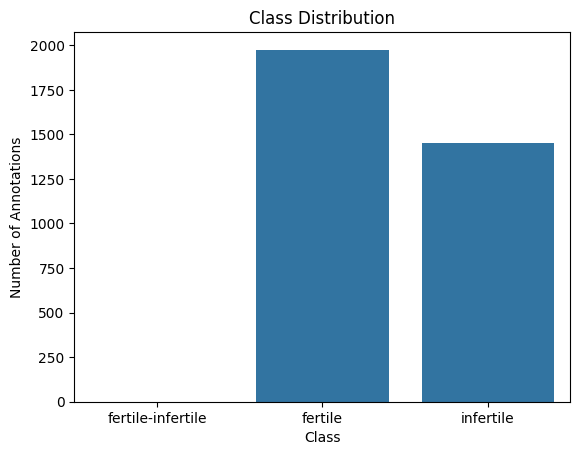

In [6]:
#Analyze Class Distribution for each class

# Get category IDs and names
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]

# Count annotations per category
category_counts = {cat['name']: 0 for cat in categories}
for ann_id in annotation_ids:
    ann = coco.loadAnns(ann_id)[0]
    cat_name = coco.loadCats(ann['category_id'])[0]['name']
    category_counts[cat_name] += 1

print("Class Distribution:", category_counts)

# Plot class distribution
import seaborn as sns
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Annotations")
plt.show()

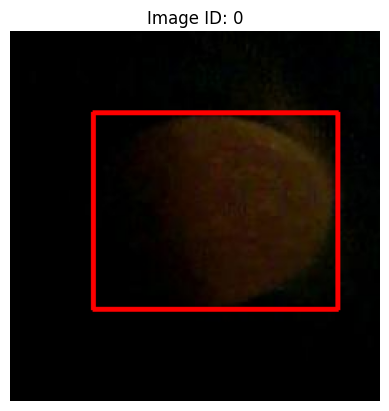

In [7]:
# Visualize Sample Images

import os  # Add this import statement at the top of your script

# Load a sample image and its annotations
sample_image_id = image_ids[0]  # Change this index to view other images
sample_image_info = coco.loadImgs(sample_image_id)[0]
sample_image_path = os.path.join("C:/Users/sirajje/Desktop/new egg dataset/train", sample_image_info['file_name'])
sample_annotations = coco.loadAnns(coco.getAnnIds(imgIds=sample_image_id))

# Load and display the image
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw bounding boxes
for ann in sample_annotations:
    bbox = ann['bbox']
    x, y, w, h = map(int, bbox)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(image)
plt.title(f"Image ID: {sample_image_id}")
plt.axis("off")
plt.show()

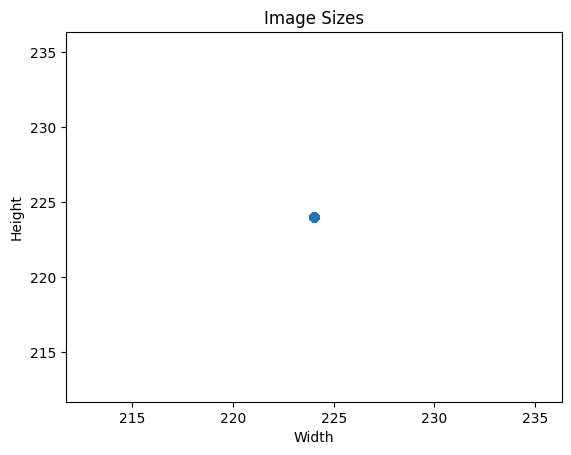

In [8]:
#Analyze Image Sizes
image_widths = []
image_heights = []

for img_id in image_ids:
    img_info = coco.loadImgs(img_id)[0]
    image_widths.append(img_info['width'])
    image_heights.append(img_info['height'])

plt.scatter(image_widths, image_heights)
plt.title("Image Sizes")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

In [9]:
# Check for Missing Data
missing_images = 0
for img_id in image_ids:
    img_info = coco.loadImgs(img_id)[0]
    image_path = os.path.join("C:/Users/sirajje/Desktop/new egg dataset/train", img_info['file_name'])
    if not os.path.exists(image_path):
        missing_images += 1

print(f"Missing Images: {missing_images}")

Missing Images: 0


In [10]:
#Compare with Validation and Test Sets (Optional)
def get_class_distribution(annotation_file):
    coco = COCO(annotation_file)
    categories = coco.loadCats(coco.getCatIds())
    category_counts = {cat['name']: 0 for cat in categories}
    for ann_id in coco.getAnnIds():
        ann = coco.loadAnns(ann_id)[0]
        cat_name = coco.loadCats(ann['category_id'])[0]['name']
        category_counts[cat_name] += 1
    return category_counts

# Paths to annotation files
train_ann_file = "C:/Users/sirajje/Desktop/new egg dataset/train/_annotations.coco.json"
valid_ann_file = "C:/Users/sirajje/Desktop/new egg dataset/valid/_annotations.coco.json"
test_ann_file = "C:/Users/sirajje/Desktop/new egg dataset/test/_annotations.coco.json"

# Get class distributions
train_dist = get_class_distribution(train_ann_file)
valid_dist = get_class_distribution(valid_ann_file)
test_dist = get_class_distribution(test_ann_file)

# Print distributions
print("Train Distribution:", train_dist)
print("Validation Distribution:", valid_dist)
print("Test Distribution:", test_dist)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=1.02s)
creating index...
index created!
Train Distribution: {'fertile-infertile': 0, 'fertile': 1975, 'infertile': 1449}
Validation Distribution: {'fertile-infertile': 0, 'fertile': 126, 'infertile': 61}
Test Distribution: {'fertile-infertile': 0, 'fertile': 67, 'infertile': 69}


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


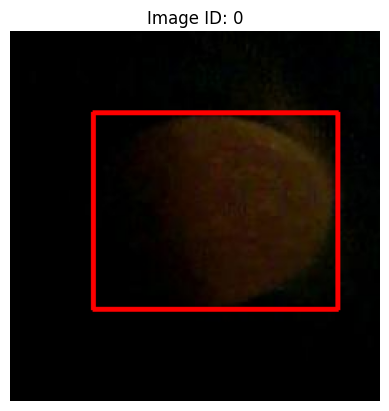

In [18]:
#Visualizing Annotations
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os

# Load COCO annotations
annotation_file = "C:/Users/sirajje/Desktop/new egg dataset/train/_annotations.coco.json"
coco = COCO(annotation_file)

# Get image and annotation IDs
image_ids = coco.getImgIds()
sample_image_id = image_ids[0]  # Change this index to view other images

# Load image and annotations
sample_image_info = coco.loadImgs(sample_image_id)[0]
sample_image_path = os.path.join("C:/Users/sirajje/Desktop/new egg dataset/train", sample_image_info['file_name'])
sample_annotations = coco.loadAnns(coco.getAnnIds(imgIds=sample_image_id))

# Load and display the image
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Draw bounding boxes
for ann in sample_annotations:
    bbox = ann['bbox']
    x, y, w, h = map(int, bbox)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(image)
plt.title(f"Image ID: {sample_image_id}")
plt.axis("off")
plt.show()

In [36]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns

def load_coco_annotations(annotation_file):
    """Load COCO annotations from a JSON file."""
    coco = COCO(annotation_file)
    return coco

def get_class_distribution(coco):
    """Get the distribution of annotations per class."""
    categories = coco.loadCats(coco.getCatIds())
    category_counts = {cat['name']: 0 for cat in categories}
    for ann_id in coco.getAnnIds():
        ann = coco.loadAnns(ann_id)[0]
        cat_name = coco.loadCats(ann['category_id'])[0]['name']
        category_counts[cat_name] += 1
    return category_counts

def visualize_sample_image(coco, image_folder, image_id):
    """Visualize a sample image with its annotations."""
    image_info = coco.loadImgs(image_id)[0]
    image_path = os.path.join(image_folder, image_info['file_name'])
    annotations = coco.loadAnns(coco.getAnnIds(imgIds=image_id))

    # Load and display the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Failed to load image at {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Draw bounding boxes
    for ann in annotations:
        bbox = ann['bbox']
        x, y, w, h = map(int, bbox)
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    plt.imshow(image)
    plt.title(f"Image ID: {image_id}")
    plt.axis("off")
    plt.show()

def analyze_image_sizes(coco):
    """Analyze the distribution of image sizes."""
    image_widths = []
    image_heights = []

    for img_id in coco.getImgIds():
        img_info = coco.loadImgs(img_id)[0]
        image_widths.append(img_info['width'])
        image_heights.append(img_info['height'])

    plt.scatter(image_widths, image_heights)
    plt.title("Image Sizes")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.show()

def check_missing_images(coco, image_folder):
    """Check for missing images in the dataset."""
    missing_images = 0
    for img_id in coco.getImgIds():
        img_info = coco.loadImgs(img_id)[0]
        image_path = os.path.join(image_folder, img_info['file_name'])
        if not os.path.exists(image_path):
            missing_images += 1
    print(f"Missing Images: {missing_images}")

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Train Class Distribution: {'fertile-infertile': 0, 'fertile': 1975, 'infertile': 1449}
Validation Class Distribution: {'fertile-infertile': 0, 'fertile': 126, 'infertile': 61}
Test Class Distribution: {'fertile-infertile': 0, 'fertile': 67, 'infertile': 69}
Visualizing a sample image from the train set:


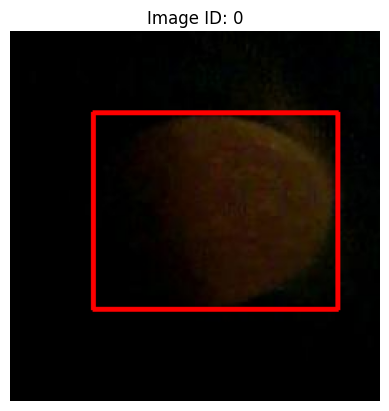

Visualizing a sample image from the validation set:


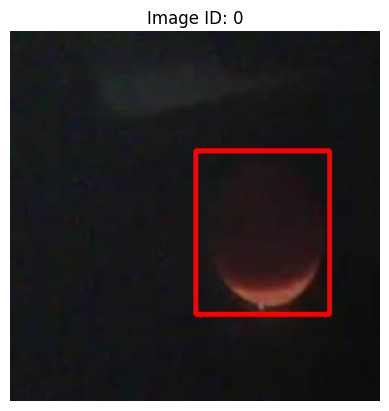

Visualizing a sample image from the test set:


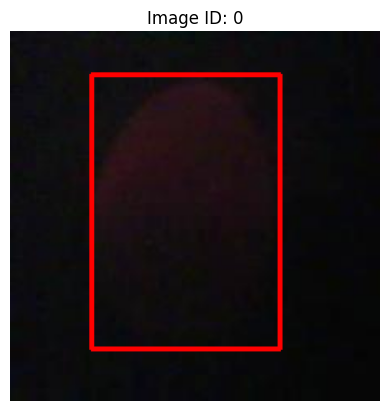

Train Image Sizes:


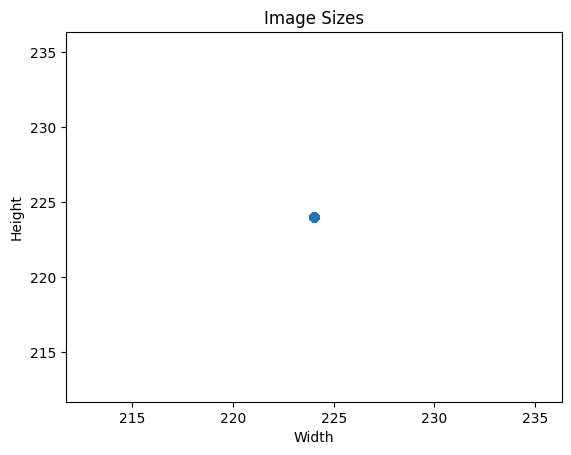

Validation Image Sizes:


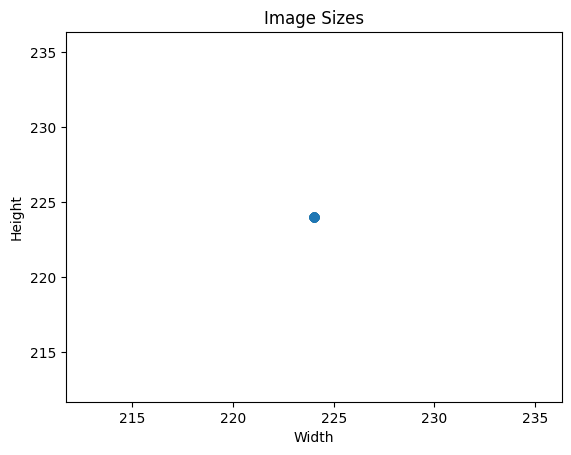

Test Image Sizes:


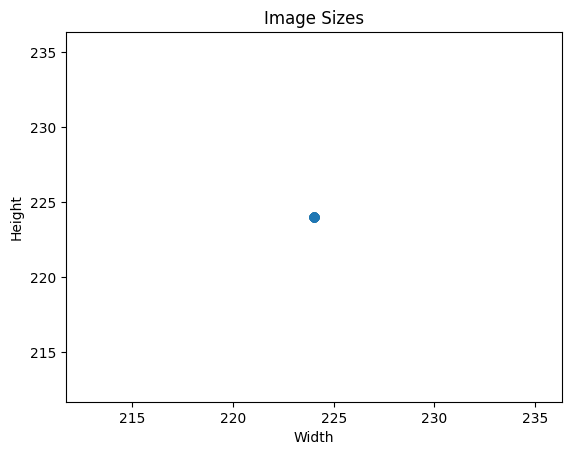

Train Missing Images:
Missing Images: 0
Validation Missing Images:
Missing Images: 0
Test Missing Images:
Missing Images: 0


In [30]:
#EDA for Train, Validation, and Test Sets
# Define paths
base_path = "C:/Users/sirajje/Desktop/new egg dataset"
train_ann_file = os.path.join(base_path, "train/_annotations.coco.json")
valid_ann_file = os.path.join(base_path, "valid/_annotations.coco.json")
test_ann_file = os.path.join(base_path, "test/_annotations.coco.json")

train_image_folder = os.path.join(base_path, "C:/Users/sirajje/Desktop/new egg dataset/train")
valid_image_folder = os.path.join(base_path, "C:/Users/sirajje/Desktop/new egg dataset/valid")
test_image_folder = os.path.join(base_path, "C:/Users/sirajje/Desktop/new egg dataset/test")

# Load annotations
train_coco = load_coco_annotations(train_ann_file)
valid_coco = load_coco_annotations(valid_ann_file)
test_coco = load_coco_annotations(test_ann_file)

# Analyze class distribution
print("Train Class Distribution:", get_class_distribution(train_coco))
print("Validation Class Distribution:", get_class_distribution(valid_coco))
print("Test Class Distribution:", get_class_distribution(test_coco))

# Visualize sample images
print("Visualizing a sample image from the train set:")
visualize_sample_image(train_coco, train_image_folder, train_coco.getImgIds()[0])

print("Visualizing a sample image from the validation set:")
visualize_sample_image(valid_coco, valid_image_folder, valid_coco.getImgIds()[0])

print("Visualizing a sample image from the test set:")
visualize_sample_image(test_coco, test_image_folder, test_coco.getImgIds()[0])

# Analyze image sizes
print("Train Image Sizes:")
analyze_image_sizes(train_coco)

print("Validation Image Sizes:")
analyze_image_sizes(valid_coco)

print("Test Image Sizes:")
analyze_image_sizes(test_coco)

# Check for missing images
print("Train Missing Images:")
check_missing_images(train_coco, train_image_folder)

print("Validation Missing Images:")
check_missing_images(valid_coco, valid_image_folder)

print("Test Missing Images:")
check_missing_images(test_coco, test_image_folder)